In [37]:
#import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [25]:
#load the dataset
df = pd.read_csv('diabetes.csv')

In [26]:
#display the first 5 rows of the dataframe
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
#check for the missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
#display the basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
#training logistic regression model
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7359307359307359
Precision: 0.6172839506172839
Recall: 0.625
F1 Score: 0.6211180124223602


<Axes: >

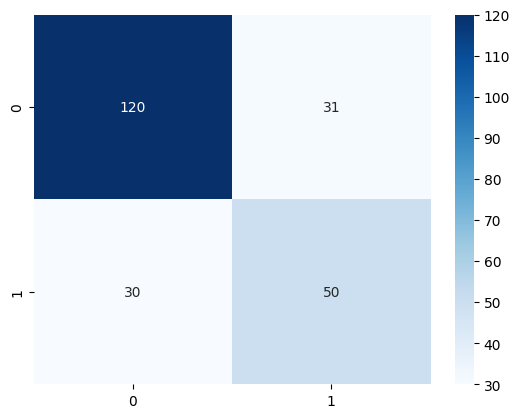

In [30]:
#visualizing the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

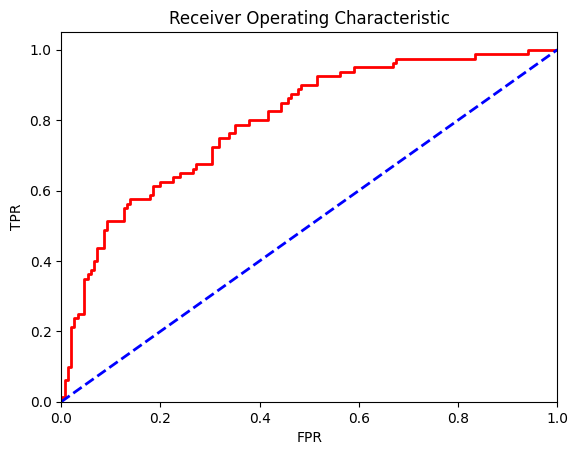

In [31]:
#Roc curve And Auc score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')

In [34]:
#Decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [35]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt}')
print(f'Precision: {precision_dt}')
print(f'Recall: {recall_dt}')
print(f'F1 Score: {f1_dt}')

Accuracy: 0.70995670995671
Precision: 0.5585585585585585
Recall: 0.775
F1 Score: 0.6492146596858639


Text(0.5, 1.0, 'Receiver Operating Characteristic')

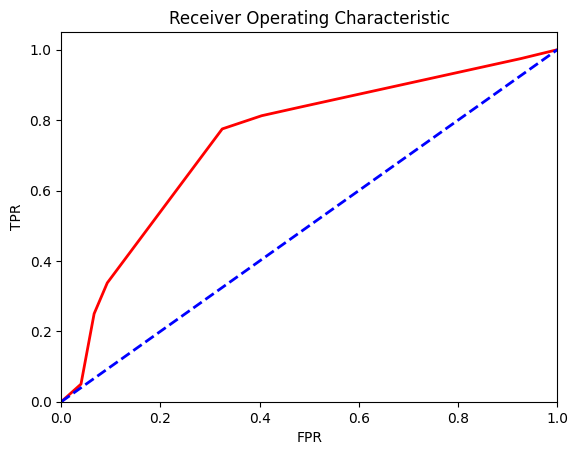

In [36]:
#Roc curve And Auc score for decision tree
y_prob = dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')

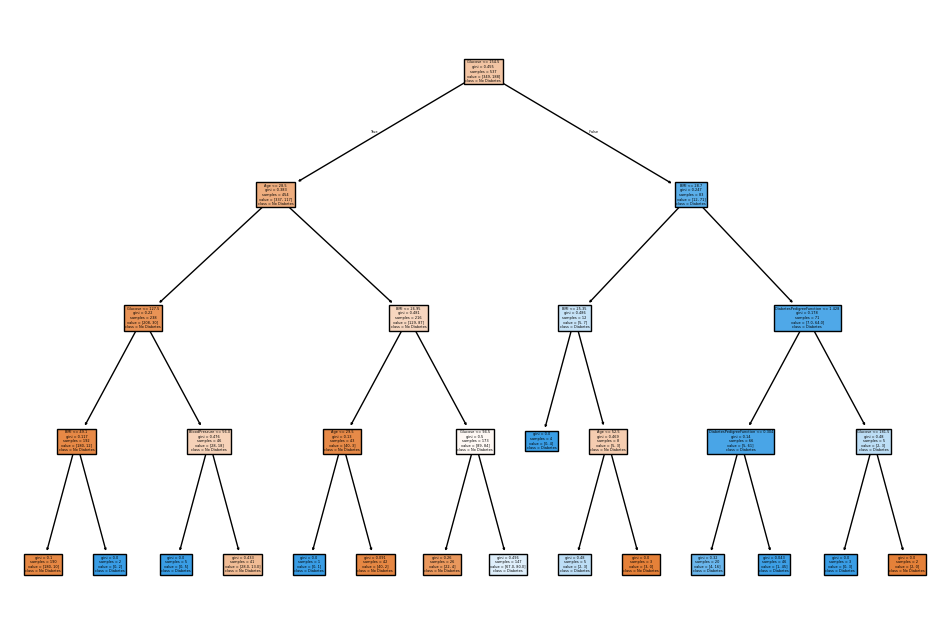

In [38]:
#plotting the decision tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

Text(0, 0.5, 'Score')

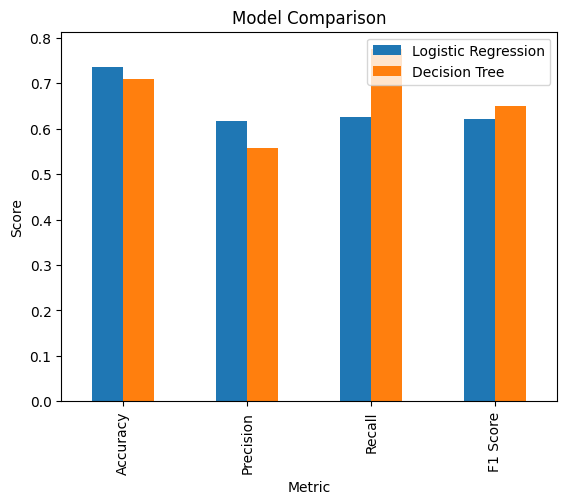

In [39]:
#comparing both metrics results
metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy, precision, recall, f1],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt]
})
metrics.set_index('Metric', inplace=True)
metrics.plot(kind='bar')
plt.title('Model Comparison')
plt.ylabel('Score') 

In [ ]:
#Dissussion
# Q1 which model performs better?
# Ans: The model with higher scores in evaluation metrices should perform better as both model are trained on the same data 
# and both model's accuracy metrics are same so the higher scores model should perform better in this case.

Object `better` not found.


In [ ]:
# Q2 Which model is easier to interpret for doctors?
# Ans: 

In [ ]:
# Q3 If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized in diagnosing diabetes?
#    Why?
# Ans: if the dataset is slightly imbalanced then in this case the we should priortize recall matric instead of precision as we want that 
#      if there is false positive that can be handled or it can be ok but we do not want false negetive meaning we don't want that if person
#      has chances of diabetes and we model is predecting as no diabetes so for this we need to use recall metric instead of precision.